In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
#import matplotlib as mpl
from scipy import optimize as scop
import pyCardiac as pc
#plt.style.use('seaborn')
import itertools
plt.style.use('/home/nik/Documents/nico_general.mplstyle')

In [2]:
V_m=np.array([30,20,10])
v_const =  -80
R=1
C=1
t = np.arange(0,1,5e-5)
v = (v_const + V_m)*np.exp(-(t)/(R*C)) - V_m
plt.plot(v)

ValueError: operands could not be broadcast together with shapes (3,) (20000,) 

In [3]:
v_list

NameError: name 'v_list' is not defined

In [4]:
t = np.arange(0,10,5e-5)
v_list = np.arange(-80,16,5)
count = 0
while count<=39:
    v_list = np.insert(v_list,count,-80)
    count+=2
v = []
count = 0
start = 0
R = 500e6
C=11e-11
for k in range(len(t)):
        v_0 = v_list[count]
        V_m = v_list[count+1]
        #print(v_0, V_m)
        v.append((v_0 - V_m)*np.exp(-(t[k]-start)/(R*C)) + V_m)
        if k%10000==0:
            count+=1
            start = t[k]
            print(start)
            
        

0.0
0.5
1.0
1.5
2.0
2.5
3.0
3.5
4.0
4.5
5.0
5.5
6.0
6.5
7.0
7.5
8.0
8.5
9.0
9.5


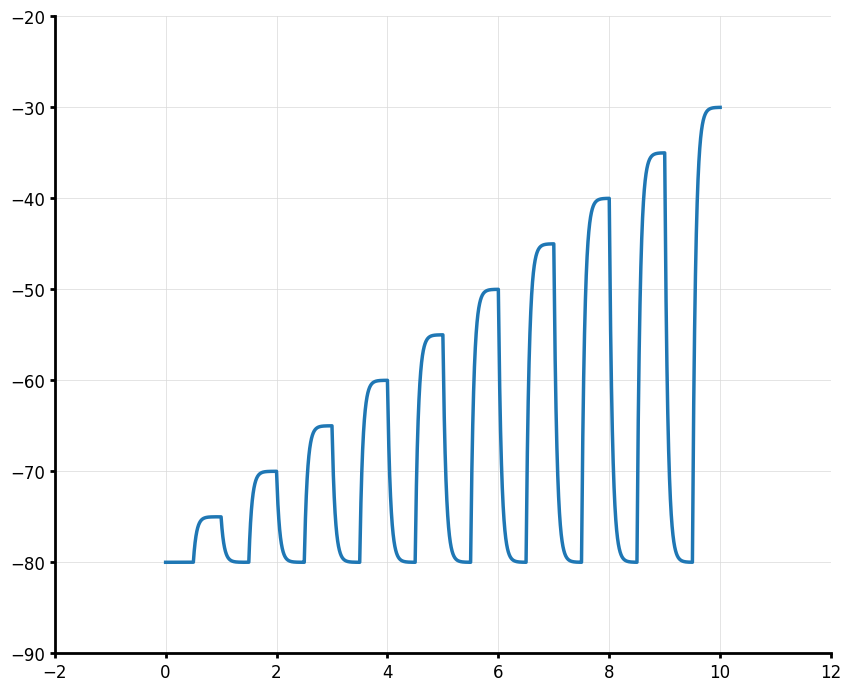

In [5]:
plt.plot(t[1:],v[1:])
#plt.plot(t[1:],v_n)


In [13]:
#plt.plot(v)
time = []
for k in range(0,78):
    time.append(t[k])
for k in range(0,1000):
    time.append(t[k])
for k in range(0,1000):
    time.append(t[k])
for k in range(0,2000):
    time.append(t[k])
for k in range(0,922):
    time.append(t[k])


In [15]:
len(v_c_f)

200000

0.0012000000000000001 0.00058


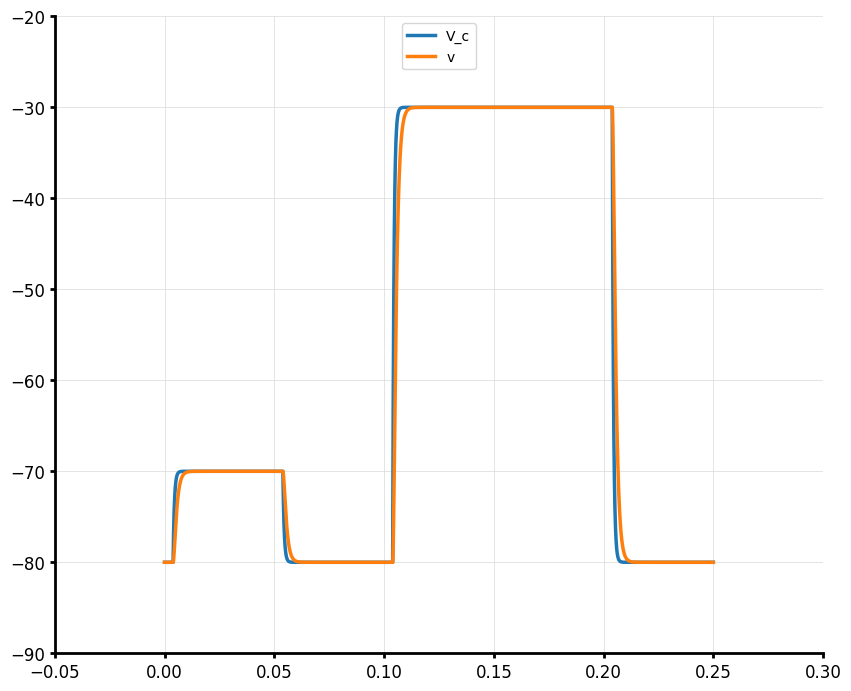

In [19]:
R_f = 50e6
C_f = 11.6e-12
R  =  100e6
C = 12e-12
    

v_list = np.array([-80,-80,-70,-80,-30,-80])
v = []
v1 = []
v_c_f = []
count = 0
start = 0
v_c_f.append(-80)
v.append(-80)
#v1.append(-80)
for k in range(1,len(time)):
    v_0 = v_list[count]
    V_m = v_list[count+1]
    #v.append((v_0 - V_m)*np.exp(-t[k]/(R*C)) + V_m)
    v_c_f.append((v_0 - V_m)*np.exp(-time[k]/(R_f*C_f)) + V_m)
    v.append(v[k-1]+(v_c_f[k-1]-v[k-1])*5e-5/(R*C))
    if k==77:
        count=1
    if k==1077:
        count=2
    if k==2077:
        count=3
    if k==4077:
        count=4
t_for_graph = np.arange(0, len(time)*5e-5,5e-5)        
#v = np.array(v) 
plt.plot(t_for_graph,v_c_f, label = 'V_c')
#plt.plot(np.diff(v_c)*R*C/np.diff(t_for_graph))
plt.plot(t_for_graph,v, label = 'v')
#plt.plot(t_for_graph,v1, label = 'v1')
plt.legend()
print(R*C, R_f*C_f)


In [104]:

def full_log(t,C_f, C,a0_m,b0_m,delta_m,s_m,a0_h,b0_h,delta_h,s_h, R,R_f, g_max):#, V_m):
    
    
    params = [a0_m,b0_m,delta_m,s_m,a0_h,b0_h,delta_h,s_h, R,C,R_f ,C_f, g_max]#, V_m]
    
    C_f = np.exp(C_f,dtype=np.float128)
    R_f = np.exp(R_f,dtype=np.float128)
    #V_m = np.exp(V_m)
    a0_m = np.exp(a0_m,dtype=np.float128)
    b0_m = np.exp(b0_m,dtype=np.float128)
    delta_m = np.exp(delta_m,dtype=np.float128)
    s_m = np.exp(s_m,dtype=np.float128)
    
    a0_h = np.exp(a0_h,dtype=np.float128)
    b0_h = np.exp(b0_h,dtype=np.float128)
    delta_h = np.exp(delta_h,dtype=np.float128)
    s_h = np.exp(s_h,dtype=np.float128) 
    R = np.exp(R,dtype=np.float128)
    C = np.exp(C,dtype=np.float128)
    g_max = np.exp(g_max,dtype=np.float128)
    
    t_for_graph = np.arange(0, len(t)*5e-5,5e-5)
  

    v_list = np.array([-80,-80,-70,-80,-30,-80])
    v = [-80]
    v_c_f = [-80]
    count = 0
    start = 0
    for k in range(1,len(t)):
        v_0 = v_list[count]
        V_m = v_list[count+1]
        v_c_f.append((v_0 - V_m)*np.exp(-t[k]/(R_f*C_f)) + V_m)
        v.append(v[k-1]+(v_c_f[k-1]-v[k-1])*5e-5/(R*C))
        #v.append((v_0 - V_m)*np.exp(-t[k]/(R*C)) + V_m)
        if k==77:
            count=1
        if k==1077:
            count=2
        if k==2077:
            count=3
        if k==4077:
            count=4
        
    v = np.array(v) 
    
    # s<0 , 0 =< delta =<1 , a0, b0 >0
    
    alfa_m = a0_m * np.exp(-delta_m * v / (-s_m))
    betta_m = b0_m * np.exp((1-delta_m) * v / (-s_m))
    
    
    alfa_h = a0_h * np.exp(-delta_h * v / s_h)
    betta_h = b0_h * np.exp((1-delta_h) * v / s_h)

    
    
    tau_m = 1/(betta_m + alfa_m)
    tau_h = 1/(betta_h + alfa_h)
    
    
    v_const = -80
    m_inf = 1/(1+betta_m/alfa_m)
    h_inf = 1/(1+betta_h/alfa_h)
    
    m0 = 1/(1+(b0_m/a0_m)*np.exp(v_const/(-s_m)))
    h0 = 1/(1+(b0_h/a0_h)*np.exp(v_const/s_h))#1/(1+betta_h_0/alfa_h_0)

    m = m_inf + (m0-m_inf)*np.exp(-t/tau_m)
    h = h_inf + (h0-h_inf)*np.exp(-t/tau_h)
    
    plt.figure()    
    plt.plot(t_for_graph,v, label = 'v')
    plt.plot(t_for_graph, v_c_f, label = 'v_c_f')
    plt.legend()

    plt.figure()
    plt.plot(v, tau_m, label = 'tau_m')
    plt.plot(v, tau_h, label = 'tau_h')
    plt.legend()

    plt.figure()
    plt.plot(v,m_inf, label = 'm_inf')
    plt.plot(v,h_inf, label = 'h_inf')
    plt.legend()

    v_rev = 18
    
    i_с=[]
    i_c_f = []
    
    for l in range(1,len(v)):
        i_с.append(1e9*C*(v[l]-v[l-1])/(t_for_graph[l]-t_for_graph[l-1]))
        i_c_f.append(1e9*C_f*(v_c_f[l]-v_c_f[l-1])/(t_for_graph[l]-t_for_graph[l-1]))

    i_с.append(i_с[-1])
    i_c_f.append(i_c_f[-1])

    plt.figure()
    plt.plot(t_for_graph, i_с, label = 'i_c')
    plt.plot(t_for_graph, i_c_f, label = 'i_c_f')
    plt.plot(t_for_graph, g_max*h*(m**3)*(v-v_rev), label = 'INa')
    #plt.plot(t_for_graph, const, label = 'const')
    plt.legend()
    
    return g_max*h*(m**3)*(v-v_rev)+i_с+ i_c_f
    #return sum((g_max*h*(m**3)*(v-v_rev)+i - data)**2)



In [84]:

def full_log_fit(x0):#, V_m):
    #C_f, C,a0_m,b0_m,delta_m,s_m,a0_h,b0_h,delta_h,s_h, R,R_f, g_max
    
    data = ff#data2020_1219_0035[10]
    t = np.load('time.npy')
    
    
    
    C_f = np.exp(x0[0],dtype=np.float128)
    C = np.exp(x0[1],dtype=np.float128)
    
    a0_m = np.exp(x0[2],dtype=np.float128)
    b0_m = np.exp(x0[3],dtype=np.float128)
    
    delta_m = np.exp(x0[4],dtype=np.float128)
    s_m = np.exp(x0[5],dtype=np.float128)
    
    a0_h = np.exp(x0[6],dtype=np.float128)
    b0_h = np.exp(x0[7],dtype=np.float128)
    
    delta_h = np.exp(x0[8],dtype=np.float128)
    s_h = np.exp(x0[9],dtype=np.float128) 
    
    R = np.exp(x0[10],dtype=np.float128)
    R_f = np.exp(x0[11],dtype=np.float128)
    
    g_max = np.exp(x0[12],dtype = np.float128)
    
    params = [C_f, C, a0_m,b0_m,delta_m,s_m,a0_h,b0_h,delta_h,s_h, R,R_f, g_max]
    #t = np.arange(0, len(data)*5e-5,5e-5)
  
    #v_const = -80 #mV
    #V_m = 30
    #v = (v_const + V_m)*np.exp(-(t)/(R*C)) - V_m
    v_list = np.array([-80,-80,-70,-80,-30,-80])
    v = [-80]
    v_c_f = [-80]
    count = 0
    start = 0
    #v_c.append(-80)
    #v.append(-80)
    for k in range(1,len(t)):
        v_0 = v_list[count]
        V_m = v_list[count+1]
        #v.append((v_0 - V_m)*np.exp(-t[k]/(R*C)) + V_m)
        v_c_f.append((v_0 - V_m)*np.exp(-t[k]/(R_f*C_f)) + V_m)
        v.append(v[k-1]+(v_c_f[k-1]-v[k-1])*5e-5/(R*C))
        if k==77:
            count=1
        if k==1077:
            count=2
        if k==2077:
            count=3
        if k==4077:
            count=4
        
    v = np.array(v) 
    
    # s<0 , 0 =< delta =<1 , a0, b0 >0
    
    alfa_m = a0_m * np.exp(-delta_m * v / (-s_m))
    betta_m = b0_m * np.exp((1-delta_m) * v / (-s_m))
    
    
    alfa_h = a0_h * np.exp(-delta_h * v / s_h)
    betta_h = b0_h * np.exp((1-delta_h) * v / s_h)

    
    
    tau_m = 1/(betta_m + alfa_m)
    tau_h = 1/(betta_h + alfa_h)
    v_const = -80
    
    
    m_inf = 1/(1+betta_m/alfa_m)
    h_inf = 1/(1+betta_h/alfa_h)
    
    m0 = 1/(1+(b0_m/a0_m)*np.exp(v_const/(-s_m)))
    h0 = 1/(1+(b0_h/a0_h)*np.exp(v_const/s_h))#1/(1+betta_h_0/alfa_h_0)

    m = m_inf + (m0-m_inf)*np.exp(-t/tau_m)
    h = h_inf + (h0-h_inf)*np.exp(-t/tau_h)
    
    
    #plt.figure()
    #plt.scatter(v_const,m0**3, label = 'm_0')
    #plt.scatter(v_const,h0, label = 'h_0')

  
    
    if False:
        


        
        plt.plot(v, tau_m, label = 'tau_m')
        plt.plot(v, tau_h, label = 'tau_h')
        plt.legend()


        plt.plot(v,m_inf, label = 'm_inf')
        plt.plot(v,h_inf, label = 'h_inf')
        plt.legend()

    v_rev = 18
    
    i_с = []
    i_c_f= []
    for l in range(1,len(v)):
        i_с.append(1e9*C*(v[l]-v[l-1])/(t_for_graph[l]-t_for_graph[l-1]))
        i_c_f.append(1e9*C_f*(v_c_f[l]-v_c_f[l-1])/(t_for_graph[l]-t_for_graph[l-1]))
    #for l in range(1,len(v)):
    #    i.append(1e9*C*(v[l]-v[l-1])/(t[l]-t[l-1]))
    #i.insert(0,i[0])
    i_с.append(i_с[-1])
    i_c_f.append(i_c_f[-1])

    #plt.scatter(['C_f','C','a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R  ','R_f','g_max'],params,s = 100, color = 'orange')
    #plt.xlim(0,10)
    return sum((g_max*h*(m**3)*(v-v_rev)+i_с+i_c_f-data)**2)
    #return sum((g_max*h*(m**3)*(v-v_rev)+i - data)**2)



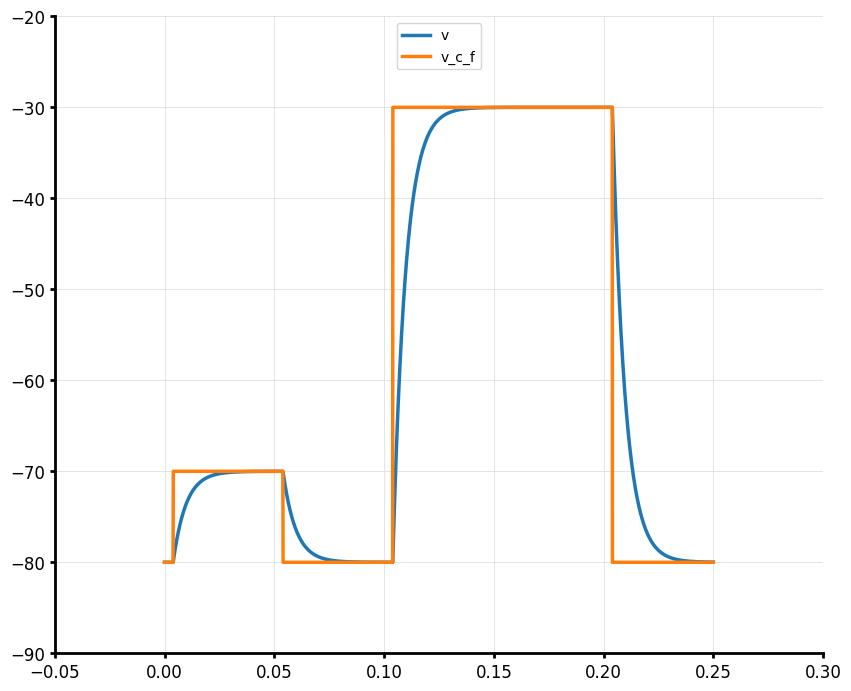

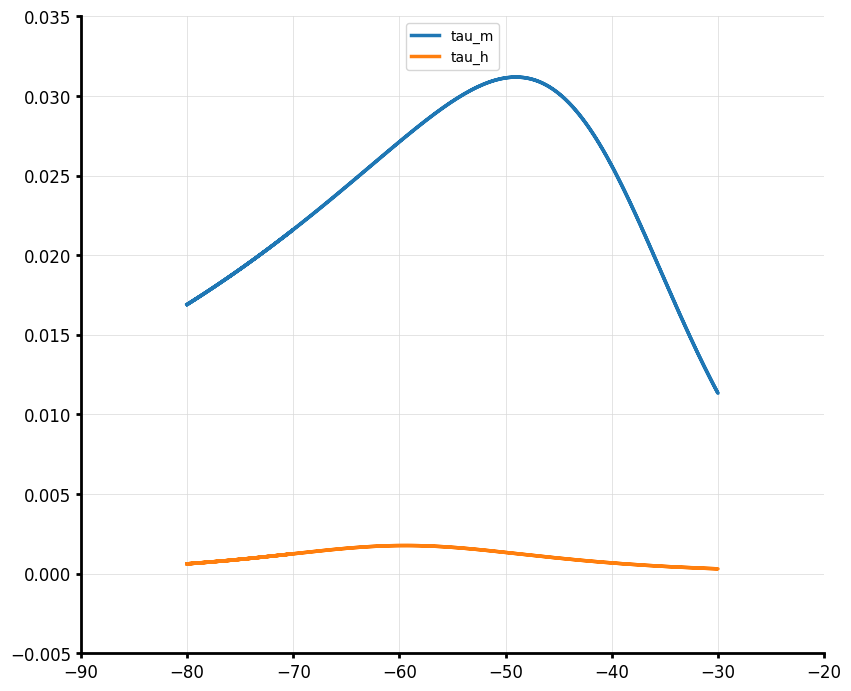

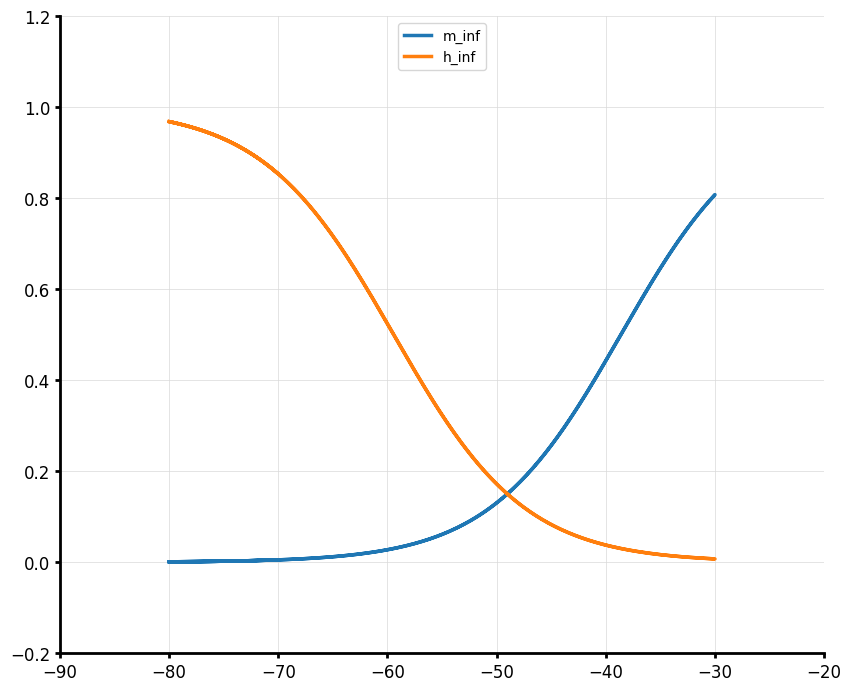

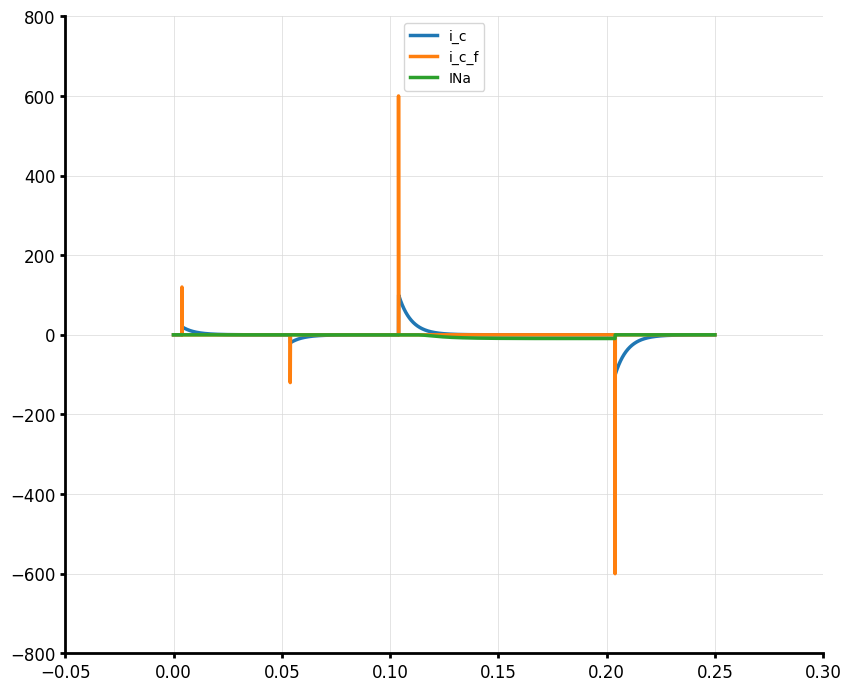

In [58]:
data2020_1219_0035 = pd.read_csv('/home/nik/Documents/comparison/19122020/2020_12_19_0035 I-V INa 11,65 pF.atf' ,delimiter= '\t', header=None, skiprows = 11)

#(t,a0_m,b0_m,delta_m,s_m,a0_h,b0_h,delta_h,s_h, R,C,R_f, C_f , g_max)
p0 = np.log(np.array([6e-13,11.6e-12,5e3,8,0.85,6,2,4e4,0.5,6,500e6,5e6,5e1]))
ff = full_log(np.array(time), *p0)

#plt.plot(data2020_1, data2020_1219_0035[10])

In [63]:
p_bas = np.array([1e-16,40e-12,100,30,0.4,12,8,400,0.9,10,5e6,500e6,7])
bas = np.log(p_bas)

In [67]:
minimizer_kwargs = {"method": "BFGS"}
ret = scop.basinhopping(full_log_fit,x0 = bas,minimizer_kwargs=minimizer_kwargs,niter=200)
ret


<ipython-input-61-3691f6169284>:47: RuntimeWarning: overflow encountered in longdouble_scalars
  v.append(v[k-1]+(v_c_f[k-1]-v[k-1])*5e-5/(R*C))
<ipython-input-61-3691f6169284>:47: RuntimeWarning: invalid value encountered in longdouble_scalars
  v.append(v[k-1]+(v_c_f[k-1]-v[k-1])*5e-5/(R*C))
<ipython-input-61-3691f6169284>:61: RuntimeWarning: overflow encountered in exp
  alfa_m = a0_m * np.exp(-delta_m * v / (-s_m))
<ipython-input-61-3691f6169284>:62: RuntimeWarning: overflow encountered in exp
  betta_m = b0_m * np.exp((1-delta_m) * v / (-s_m))
<ipython-input-61-3691f6169284>:65: RuntimeWarning: overflow encountered in exp
  alfa_h = a0_h * np.exp(-delta_h * v / s_h)
<ipython-input-61-3691f6169284>:66: RuntimeWarning: overflow encountered in exp
  betta_h = b0_h * np.exp((1-delta_h) * v / s_h)
<ipython-input-61-3691f6169284>:70: RuntimeWarning: divide by zero encountered in true_divide
  tau_m = 1/(betta_m + alfa_m)
<ipython-input-61-3691f6169284>:71: RuntimeWarning: divide by zero

                        fun: nan
 lowest_optimization_result:       fun: nan
 hess_inv: array([[ 1.00000000e+00, -7.84761437e-10,  2.27479139e-11,
        -2.62919364e-11,  3.54058195e-12,  6.18494252e-11,
         7.68438490e-12, -6.94807555e-12,  1.98776041e-12,
        -2.27929248e-11, -5.56413166e-10,  0.00000000e+00,
         9.98938544e-12],
       [-7.84761437e-10,  6.59869707e-01, -1.82952067e-07,
         2.08851231e-07, -2.67670906e-08, -4.53255333e-07,
        -6.26019356e-08,  5.91439397e-08, -9.83768449e-09,
         1.89194691e-07,  4.73757396e-01,  0.00000000e+00,
        -8.32429691e-08],
       [ 2.27479139e-11, -1.82952067e-07,  1.00000000e+00,
        -4.30384711e-09,  5.79574242e-10,  1.01244209e-08,
         1.25789180e-09, -1.13736158e-09,  3.25386530e-10,
        -3.73107662e-09, -1.51851736e-08,  0.00000000e+00,
         1.63520749e-09],
       [-2.62919364e-11,  2.08851231e-07, -4.30384711e-09,
         1.00000000e+00, -6.69869352e-10, -1.17017609e-08,
        

In [93]:
scop.rosen

<function scipy.optimize.optimize.rosen(x)>

In [94]:
#time = np.load('time.npy')
p0 = np.array([1e-16,40e-12,100,30,0.4,12,8,400,0.9,10,5e6,500e6,7])
log_p0 = np.log(p0)
#p0 = [5e3,8,0.85,-6,2,4e4,0.5,6,500e6,11.6e-12,6e3]



bounds = [(1e-20,1e-9), 
         (1e-13,1e-10),
         (1e-20,1e80),
         (1e-30,1e6),
         (1e-20,1),
         (1e-20,1e4),
         (1e-20,1e8),
         (1e-20,1e8),
         (1e-20,1),
         (1e-20,1e8),
         (1e6,1e10),
         (1e5,1e12),
         (1e-15,1e50)]

bounds_log = [(-50, -21),
             (-30, -24),
             (-50, 185),
             (-100, 14),
             (-50, 0),
             (-50, 10),
             (-50, 20),
             (-50, 20),
             (-50, 0),
             (-50, 20),
             ( 15, 30),
             ( 15, 30),
             (-40, 120)]

result = scop.differential_evolution(full_log_fit,bounds_log)#, workers=4)

<ipython-input-84-3691f6169284>:61: RuntimeWarning: overflow encountered in exp
  alfa_m = a0_m * np.exp(-delta_m * v / (-s_m))
<ipython-input-84-3691f6169284>:62: RuntimeWarning: overflow encountered in exp
  betta_m = b0_m * np.exp((1-delta_m) * v / (-s_m))
<ipython-input-84-3691f6169284>:65: RuntimeWarning: overflow encountered in exp
  alfa_h = a0_h * np.exp(-delta_h * v / s_h)
<ipython-input-84-3691f6169284>:66: RuntimeWarning: overflow encountered in exp
  betta_h = b0_h * np.exp((1-delta_h) * v / s_h)
<ipython-input-84-3691f6169284>:78: RuntimeWarning: overflow encountered in exp
  m0 = 1/(1+(b0_m/a0_m)*np.exp(v_const/(-s_m)))
<ipython-input-84-3691f6169284>:81: RuntimeWarning: divide by zero encountered in true_divide
  m = m_inf + (m0-m_inf)*np.exp(-t/tau_m)
<ipython-input-84-3691f6169284>:81: RuntimeWarning: invalid value encountered in true_divide
  m = m_inf + (m0-m_inf)*np.exp(-t/tau_m)
<ipython-input-84-3691f6169284>:82: RuntimeWarning: divide by zero encountered in true_

In [108]:
time

array([0.000e+00, 5.000e-05, 1.000e-04, ..., 4.595e-02, 4.600e-02,
       4.605e-02])

In [30]:
#(t,a0_m=5e3,b0_m=8,delta_m=0.85,s_m=-5,a0_h=2,b0_h=4e4,delta_h=0.5,s_h=4, R = 500e6,C = 11.6e-12,C_f = 6e-15, g_max=1e3)
#p0 = np.array([5e3,8,0.85,6,2,4e4,0.5,6,500e6,11.6e-12,50e6,6e-15,5e3])
#p0 = np.array([5e3,8,0.85,6,2,4e4,0.5,6,500e6,11.6e-12,5e6,6e-13,5e3])
p0 = np.array([1e-16,40e-12,100,30,0.4,12,8,400,0.9,10,5e6,500e6,7])
log_p0 = np.log(p0)
#p0 = [5e3,8,0.85,-6,2,4e4,0.5,6,500e6,11.6e-12,6e3]
bounds = ([1e-20,1e-13,1e-20,1e-30,1e-20,1e-20,1e-20,1e-20,1e-20,1e-20,1e6,1e5,1e-15],[1e-9,1e-10,1e80,106,1,1e4,1e8,1e8,1,1e8,1e10,1e12,1e50])


#p0 = np.array([5e3,8,0.85,6,2,4e4,0.5,6,500e6,11.6e-12,5e3])
#log_p0 = np.log(p0)
data =  data2020_1219_0035[10] - np.mean(data2020_1219_0035[10][:78])#current_2020_1219_0035[10]
#p0 = [5e3,8,0.85,-6,2,4e4,0.5,6,500e6,11.6e-12,6e3]
#bounds = ([1e-20,1e-20,1e-4,1e-20,1e-20,1e-20,1e-4,1e-20,1e6,1e-13,1],[1e10,1e6,1,1e4,1e8,1e8,1,1e8,1e10,1e-10,1e6])
log_bounds = (np.log(bounds[0]),np.log(bounds[1]))

result = scop.curve_fit(full_log_fit,time,ff,p0 = log_p0,  bounds = log_bounds)#, maxfev = 1e10)

plt.scatter(['C_f','C','a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R  ','R_f','g_max'],log_bounds[0], marker='_', color = 'g', s = 500)
plt.scatter(['C_f','C','a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R  ','R_f','g_max'],log_bounds[1], marker='_', color = 'r', s = 500)
plt.scatter(['C_f','C','a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R  ','R_f','g_max'],result[0], marker='+', color = 'k', s = 300, label  = 'result')
plt.scatter(['C_f','C','a0_m ','b0_m','delta_m','s_m','a0_h','b0_h','delta_h','s_h',' R  ','R_f','g_max'],log_p0, marker='*', color = 'b', s = 100, label  = 'initial')
plt.legend()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f0059f64dc0> (for post_execute):


KeyboardInterrupt: 